# ***start***

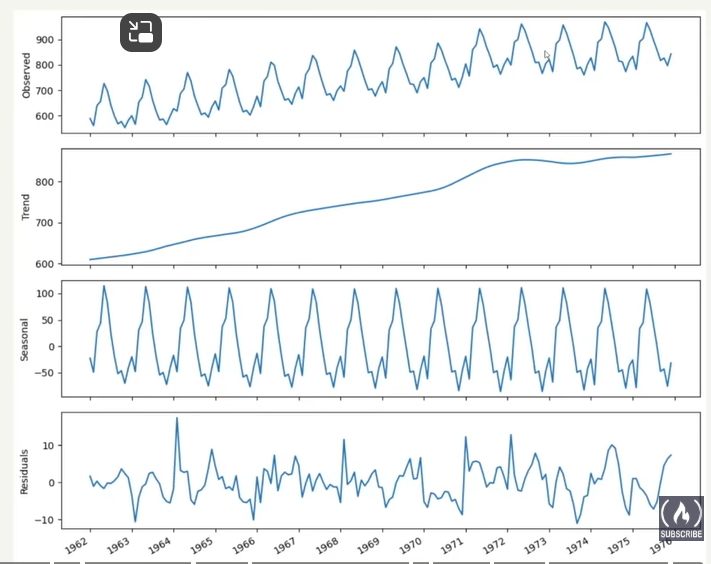

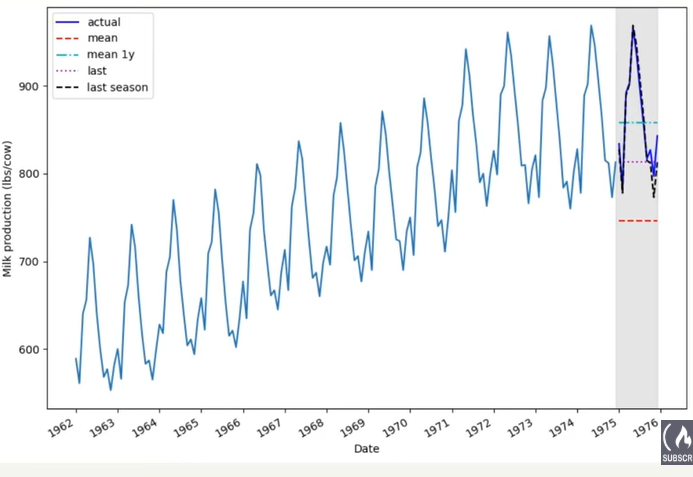

In [1]:
!pip install utilsforecast statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.6/354.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.5/280.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utilsforecast
import statsforecast

from utilsforecast.plotting import plot_series
from utilsforecast.losses import *
from utilsforecast.evaluation import evaluate

In [3]:
path = "/content/daily_sales_french_bakery.csv"
df = pd.read_csv(path)
df.head()

unique_id          ds     y  unit_price
0  12 MACARON  2022-07-13  10.0        10.0
1  12 MACARON  2022-07-14   0.0        10.0
2  12 MACARON  2022-07-15   0.0        10.0
3  12 MACARON  2022-07-16  10.0        10.0
4  12 MACARON  2022-07-17  30.0        10.0

In [4]:
df.groupby("unique_id").filter(lambda x: len(x) >= 28)
'''
.filter() keeps only groups that satisfy a condition.
lambda x: len(x) >= 28 → keeps groups where the number of rows ≥ 28.
'''
df = df.drop(columns=["unit_price"])
df.head()

unique_id          ds     y
0  12 MACARON  2022-07-13  10.0
1  12 MACARON  2022-07-14   0.0
2  12 MACARON  2022-07-15   0.0
3  12 MACARON  2022-07-16  10.0
4  12 MACARON  2022-07-17  30.0

In [5]:
print(np.unique(df["unique_id"]))

['12 MACARON' 'ARMORICAIN' 'ARTICLE 295' 'BAGUETTE' 'BAGUETTE APERO'
 'BAGUETTE GRAINE' 'BANETTE' 'BANETTINE' 'BOISSON 33CL' 'BOTTEREAU'
 'BOULE 200G' 'BOULE 400G' 'BOULE POLKA' 'BRIOCHE' 'BRIOCHE DE NOEL'
 'BRIOCHETTE' 'BROWNIES' 'BUCHE 4PERS' 'BUCHE 6PERS' 'BUCHE 8PERS'
 'CAFE OU EAU' 'CAKE' 'CAMPAGNE' 'CARAMEL NOIX' 'CEREAL BAGUETTE'
 'CHAUSSON AUX POMMES' 'CHOCOLAT' 'CHOU CHANTILLY' 'COMPLET' 'COOKIE'
 'COUPE' 'CROISSANT' 'CROISSANT AMANDES' 'CRUMBLE'
 'CRUMBLECARAMEL OU PISTAE' 'DELICETROPICAL' 'DEMI BAGUETTE' 'DEMI PAIN'
 'DIVERS BOISSONS' 'DIVERS BOULANGERIE' 'DIVERS CONFISERIE'
 'DIVERS PATISSERIE' 'DIVERS SANDWICHS' 'DIVERS VIENNOISERIE'
 'DOUCEUR D HIVER' 'ECLAIR' 'ECLAIR FRAISE PISTACHE' 'ENTREMETS' 'FICELLE'
 'FINANCIER' 'FINANCIER X5' 'FLAN' 'FLAN ABRICOT' 'FONDANT CHOCOLAT'
 'FORMULE PATE' 'FORMULE PLAT PREPARE' 'FORMULE SANDWICH' 'FRAISIER'
 'FRAMBOISIER' 'GACHE' 'GAL FRANGIPANE 4P' 'GAL FRANGIPANE 6P'
 'GAL POIRE CHOCO 4P' 'GAL POIRE CHOCO 6P' 'GAL POMME 4P' 'GAL POMME 

In [6]:
df.info()
# ds is an object whne it should be a datetime obj

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57046 entries, 0 to 57045
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  57046 non-null  object 
 1   ds         57046 non-null  object 
 2   y          57046 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


In [7]:
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57046 entries, 0 to 57045
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  57046 non-null  object        
 1   ds         57046 non-null  datetime64[ns]
 2   y          57046 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ MB


In [8]:
plot_series(df=df,ids=["MACARON","BAGUETTE"],palette = "cividis")
'''
Sequential (viridis, plasma) → gradient bars or line colors smoothly changing from low → high

Diverging (RdBu, coolwarm) → middle = neutral (white), extremes = distinct colors

Qualitative (tab10, Set1) → each category/line gets its own distinct color, no gradient
'''

'\nSequential (viridis, plasma) → gradient bars or line colors smoothly changing from low → high\n\nDiverging (RdBu, coolwarm) → middle = neutral (white), extremes = distinct colors\n\nQualitative (tab10, Set1) → each category/line gets its own distinct color, no gradient\n'

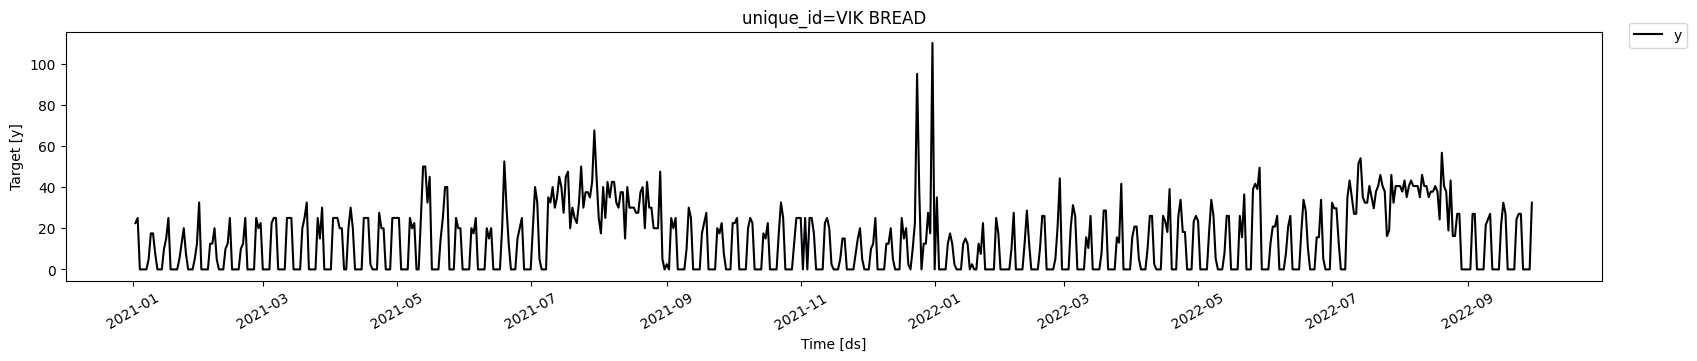

In [9]:
plot_series(df=df,ids=["VIK BREAD"],palette = "magma")

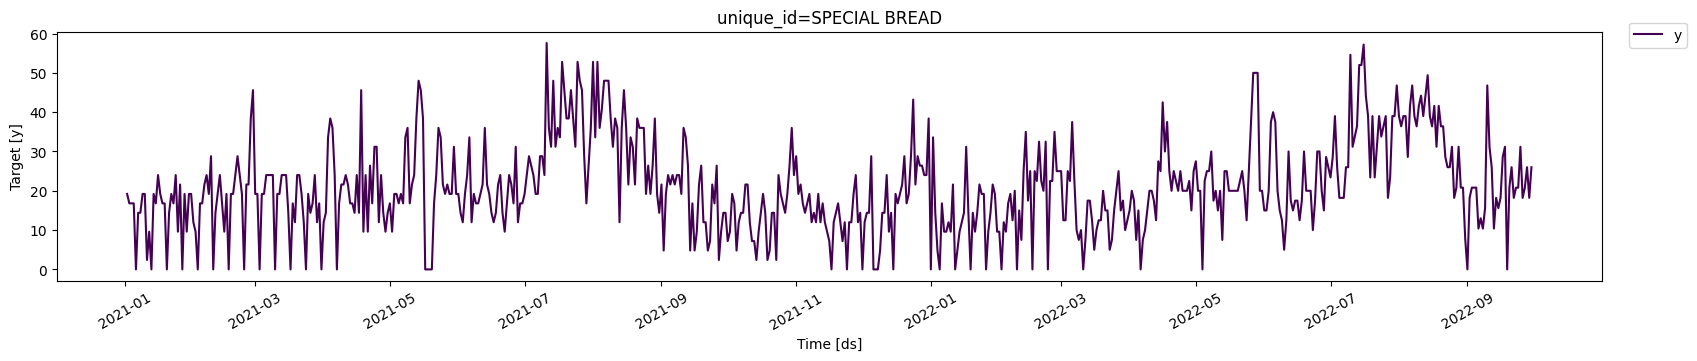

In [10]:
plot_series(df=df,ids=["SPECIAL BREAD"],palette="viridis")

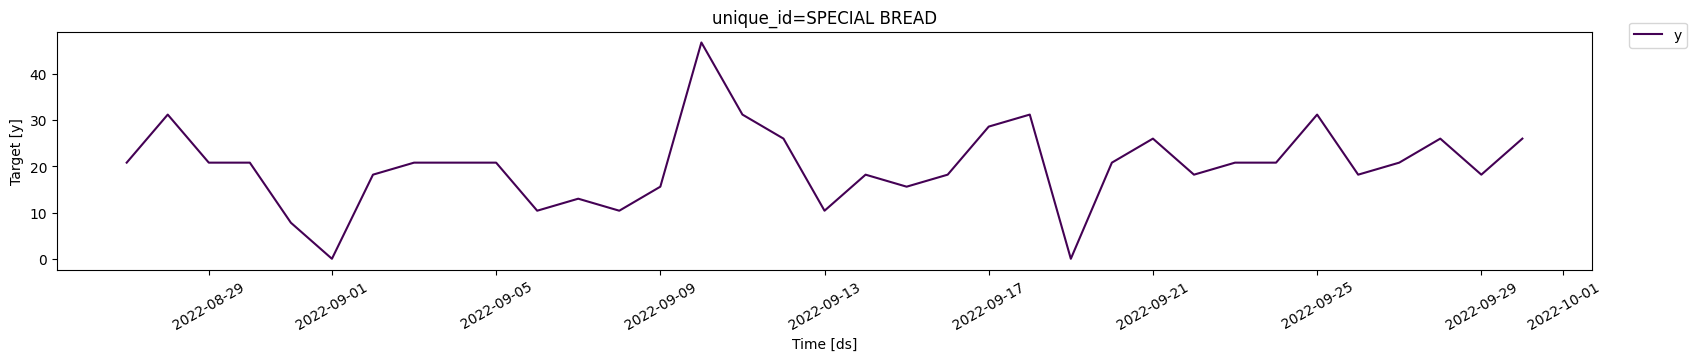

In [11]:
plot_series(df=df,ids=["SPECIAL BREAD"],palette="viridis",max_insample_length = 35)
# max_insample_llength allows to plot only last few time stamp like we aer plotting
# last 35 time stamps over here


# **baseline models**

In [12]:
from statsforecast.models import HistoricAverage, WindowAverage, Naive, SeasonalNaive

In [13]:
# we have dailt data so we could consider the past week for predicting the next ones
horizon = 7 # 7 days = week  and the unit of horizon is days


models = [
    Naive(), # forecast the last time stamp to be the next one
    HistoricAverage(), # forecast using the mean of all obervations
    WindowAverage(window_size=horizon), # forcast using the mean of a certain window / period
    SeasonalNaive(season_length  =7) # just say that the last cycle is going to be the patten for the next one
    # - we choose the season length to be 7 since after eery 7 days the pattern repeats in plotting
    ]
sf = statsforecast.StatsForecast(models = models, freq= "D") # daily data so D
sf.fit(df=df)
preds = sf.predict(h=horizon)
preds.head()

unique_id         ds  Naive  HistoricAverage  WindowAverage  SeasonalNaive
0  12 MACARON 2022-09-29   10.0         8.974359       2.857143            0.0
1  12 MACARON 2022-09-30   10.0         8.974359       2.857143            0.0
2  12 MACARON 2022-10-01   10.0         8.974359       2.857143           10.0
3  12 MACARON 2022-10-02   10.0         8.974359       2.857143            0.0
4  12 MACARON 2022-10-03   10.0         8.974359       2.857143            0.0

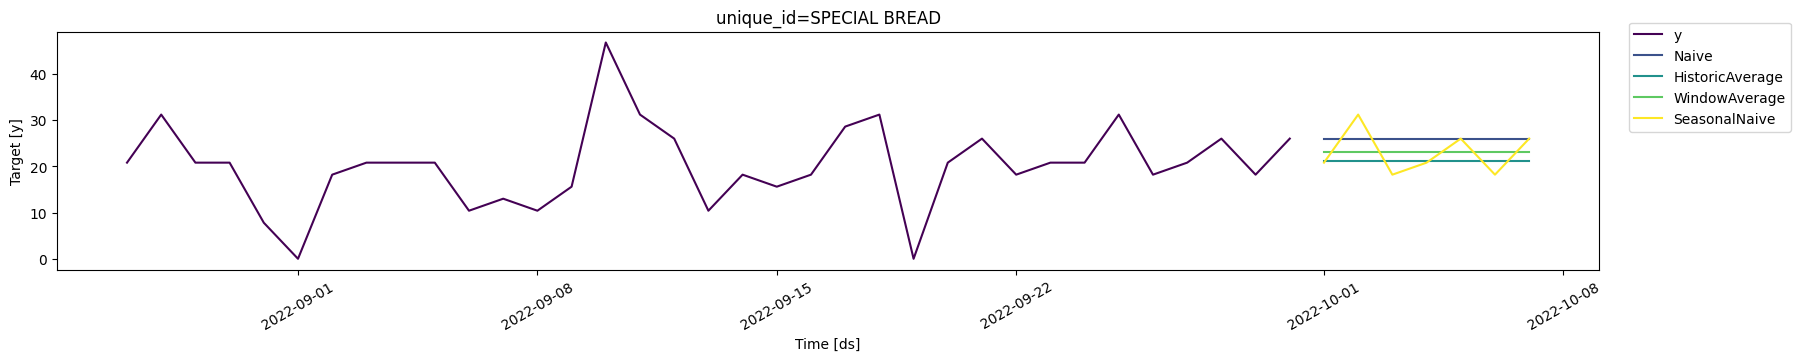

In [14]:
plot_series(
    df=df,
    forecasts_df=preds,
    ids=["SPECIAL BREAD"],
    palette="viridis",
    max_insample_length = 35
)

# **Evaluate base models**

In [15]:
test = df.groupby("unique_id").tail(10)
# train = df.groupby('id').sample(100)
train = df.drop(test.index).reset_index(drop=True)
sf.fit(df=train)
preds = sf.predict(h=horizon)

In [16]:
train.head()

unique_id         ds     y
0  12 MACARON 2022-07-13  10.0
1  12 MACARON 2022-07-14   0.0
2  12 MACARON 2022-07-15   0.0
3  12 MACARON 2022-07-16  10.0
4  12 MACARON 2022-07-17  30.0

In [17]:
test.head()

unique_id         ds    y
68  12 MACARON 2022-09-19  0.0
69  12 MACARON 2022-09-20  0.0
70  12 MACARON 2022-09-21  0.0
71  12 MACARON 2022-09-22  0.0
72  12 MACARON 2022-09-23  0.0

In [18]:
evals_df = pd.merge(test,preds,"left",['ds',"unique_id"])
evaluation = evaluate(
    evals_df,
    metrics = [mae]

)
evaluation.head()

unique_id metric      Naive  HistoricAverage  WindowAverage  \
0      12 MACARON    mae   1.428571         8.571429       2.448980   
1      ARMORICAIN    mae        NaN              NaN            NaN   
2     ARTICLE 295    mae        NaN              NaN            NaN   
3        BAGUETTE    mae  10.142857         9.607063       9.448980   
4  BAGUETTE APERO    mae   0.642857         1.022841       0.642857   

   SeasonalNaive  
0       2.857143  
1            NaN  
2            NaN  
3      11.571429  
4       0.642857

In [19]:
evaluation1= evaluation.drop(["unique_id"], axis=1).groupby("metric").mean()

In [20]:
evaluation1.head()

Naive  HistoricAverage  WindowAverage  SeasonalNaive
metric                                                         
mae     4.455102         5.048171        4.29458       3.817838

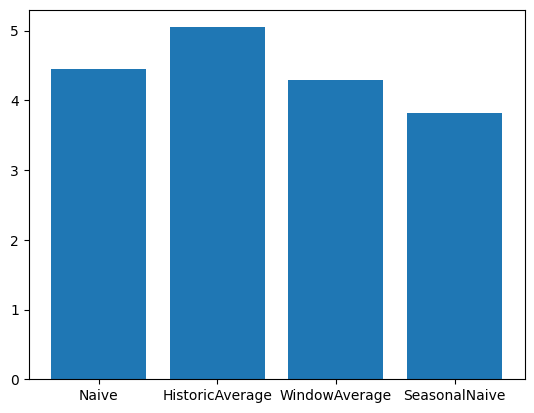

In [21]:
evaluation1.reset_index()
y = evaluation1.iloc[0]
x = evaluation1.columns
plt.bar(x,y)
plt.show()

In [22]:
#  since seasonal naive has the most minimum model so seasonal naive is the best base model


# **ARIMA model**

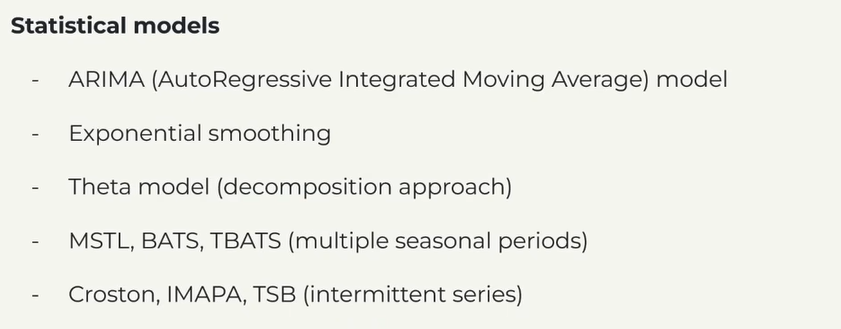


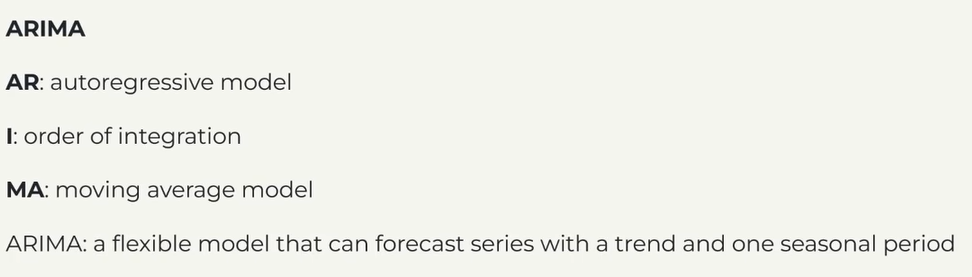

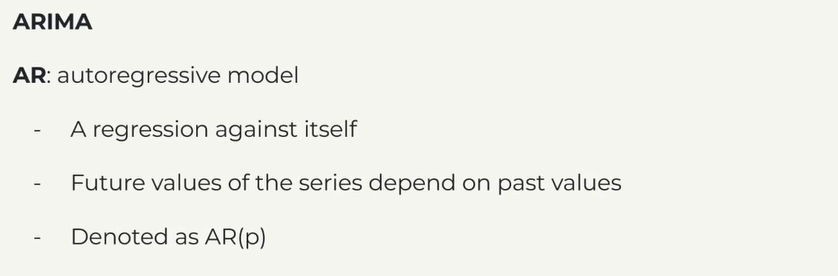

In [23]:
# ARIMA - fundamental data - we can handle seasonal data and exogenous features
# exponential smoothing works best on seasonal data
# intermittant series - you have data with zeros and non-zeros
# for series with one seasonal period -
# for series iwth more than one seasonal period use mstls and tbats
# p is autoregression order - it controls how many past values do we consider

# **ARMA**

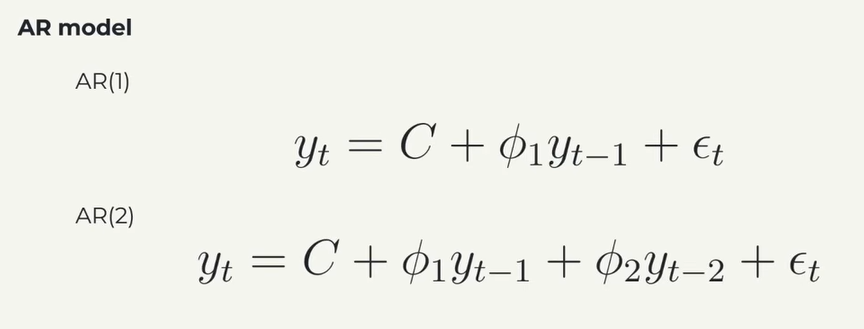

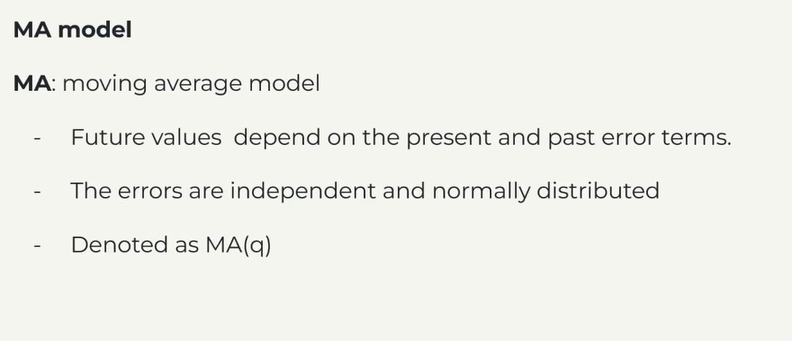

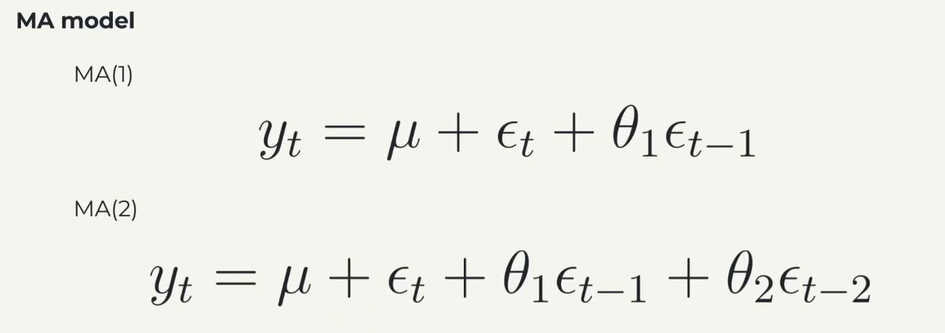

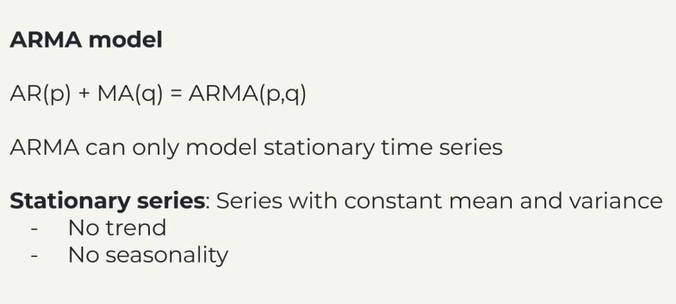

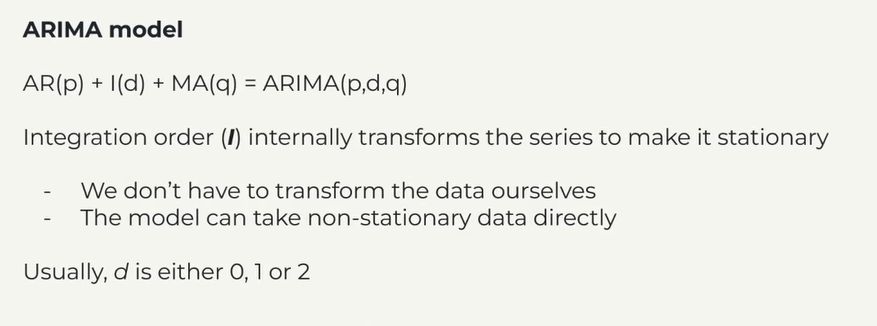

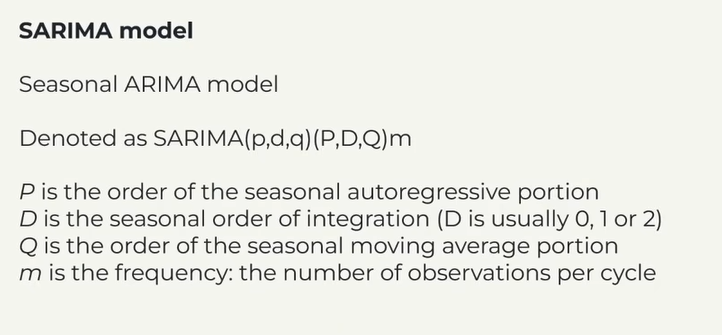

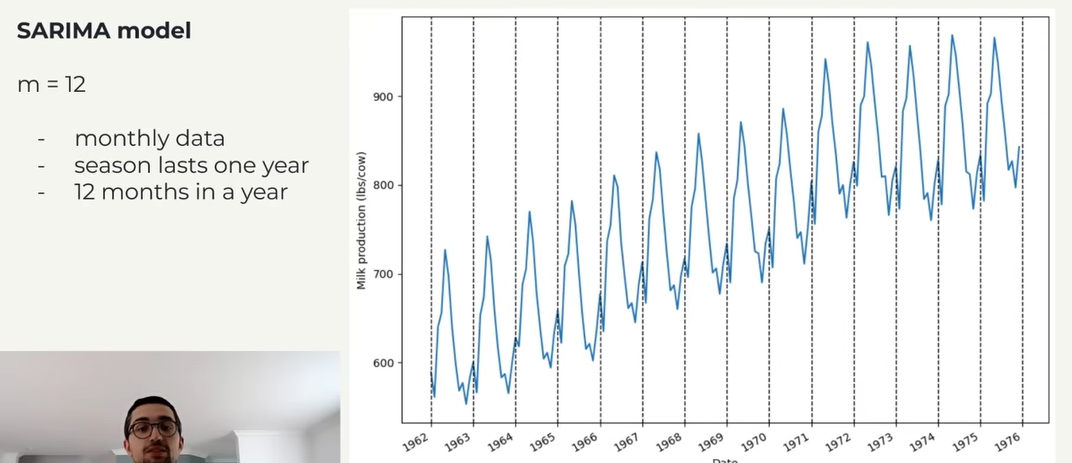

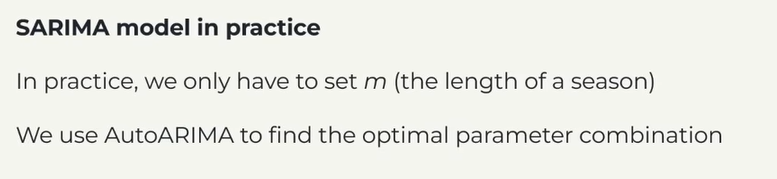

In [24]:
# MA says series are some kind of average values and they are bouncing up
# and down due to some random error terms - this is what we are going ot use to forecast
from statsforecast.models import AutoARIMA

In [25]:
# In time series model where we have classes with series like___ there is a pattern
# related to  cake sales ,etc - you fit one model per class - so we are storing those
ids = ["MACARON","BAGUETTE","VIK BREAD"]
train = train[train["unique_id"].isin(ids)]
print(train.shape)
test = test[test["unique_id"].isin(ids)]
print(test.shape)
train.head()


(1325, 3)
(30, 3)


unique_id         ds     y
68  BAGUETTE 2021-01-02  41.4
69  BAGUETTE 2021-01-03  31.5
70  BAGUETTE 2021-01-04  27.0
71  BAGUETTE 2021-01-05  26.1
72  BAGUETTE 2021-01-06   0.0

In [26]:
test.head()

unique_id         ds     y
711  BAGUETTE 2022-09-21  11.0
712  BAGUETTE 2022-09-22  34.0
713  BAGUETTE 2022-09-23  12.0
714  BAGUETTE 2022-09-24  28.0
715  BAGUETTE 2022-09-25  36.0

In [27]:
arima_models = [
    AutoARIMA(seasonal = False,alias="ARIMA"),
    AutoARIMA(seasonal = True,season_length = 7,alias = "SARIMA")
    ]
sf = statsforecast.StatsForecast(models = arima_models,freq="D")
sf.fit(train)
preds = sf.predict(h = 7)

In [28]:
evaluation_arima_df = pd.merge(test,preds,'left',["ds","unique_id"])
evaluation_arima = evaluate(
    evaluation_arima_df,
    metrics = [mae]
)

In [29]:
evaluation_arima.head()

unique_id metric     ARIMA    SARIMA
0   BAGUETTE    mae  9.059139  9.373744
1    MACARON    mae  3.987928  3.987928
2  VIK BREAD    mae  4.699120  7.007036

In [30]:
evaluation_arima= evaluation_arima.drop(["unique_id"], axis=1).groupby("metric").mean()

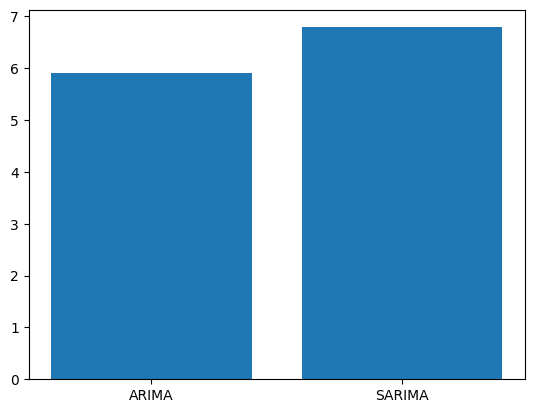

In [31]:
evaluation_arima.reset_index()
y = evaluation_arima.iloc[0]
x = evaluation_arima.columns
plt.bar(x,y)
plt.show()

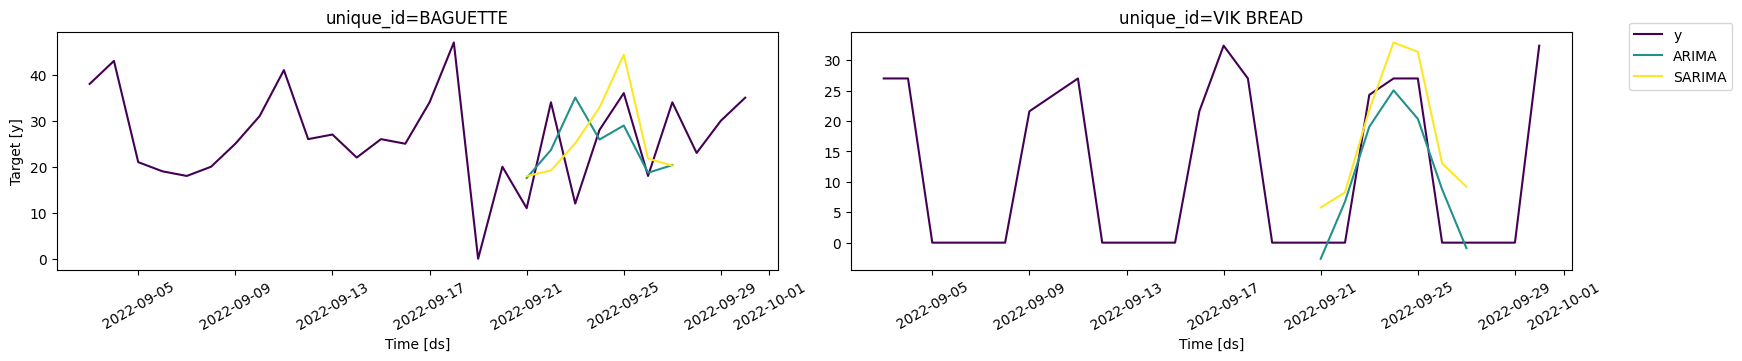

In [32]:
plot_series(
    df=df,
    forecasts_df = preds,
    ids = ["BAGUETTE","VIK BREAD"],
    max_insample_length= 28,
    palette = "viridis"
)

# **Cross validation**

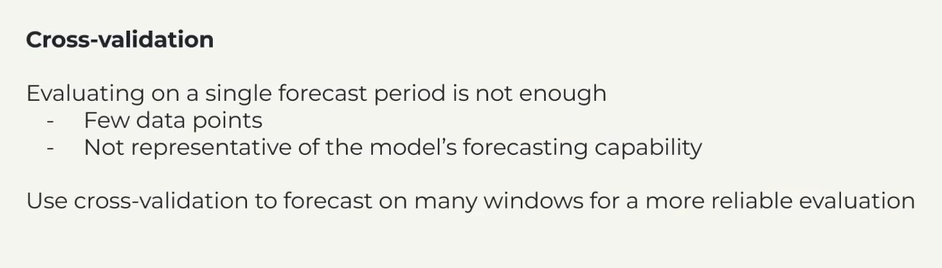

In [34]:
# In time series model where we have classes with series like___ there is a pattern
# related to  cake sales ,etc - you fit one model per class - so we are storing those
ids = ["MACARON","BAGUETTE","VIK BREAD"]
df_ = df[df["unique_id"].isin(ids)]


In [35]:
arima_models = [
    AutoARIMA(season_length=7),
    AutoARIMA(seasonal = False,alias="ARIMA"),
    AutoARIMA(season_length = 7,alias = "SARIMA")
    ]
sf = statsforecast.StatsForecast(models = arima_models,freq="D")
cv_df = sf.cross_validation(
    h = horizon,
    df = df_,
    step_size = horizon, # ( no overlapping windows --- if < horizon then overlapping regions you would have one time stamp forecasted many times )
    n_windows = 8, # with in a horizon of 7 - we have 8 windows are forecast # 56 cross validation
    refit= True # if you want model to be updated every time ---
)
cv_df.head()

unique_id         ds     cutoff     y  AutoARIMA      ARIMA     SARIMA
0  BAGUETTE 2022-08-06 2022-08-05  55.0  71.584713  71.355196  71.584713
1  BAGUETTE 2022-08-07 2022-08-05  67.0  78.458883  70.337980  78.458883
2  BAGUETTE 2022-08-08 2022-08-05  61.0  57.001732  61.195004  57.001732
3  BAGUETTE 2022-08-09 2022-08-05  52.0  49.401144  52.649013  49.401144
4  BAGUETTE 2022-08-10 2022-08-05  57.0  49.725278  47.785876  49.725278

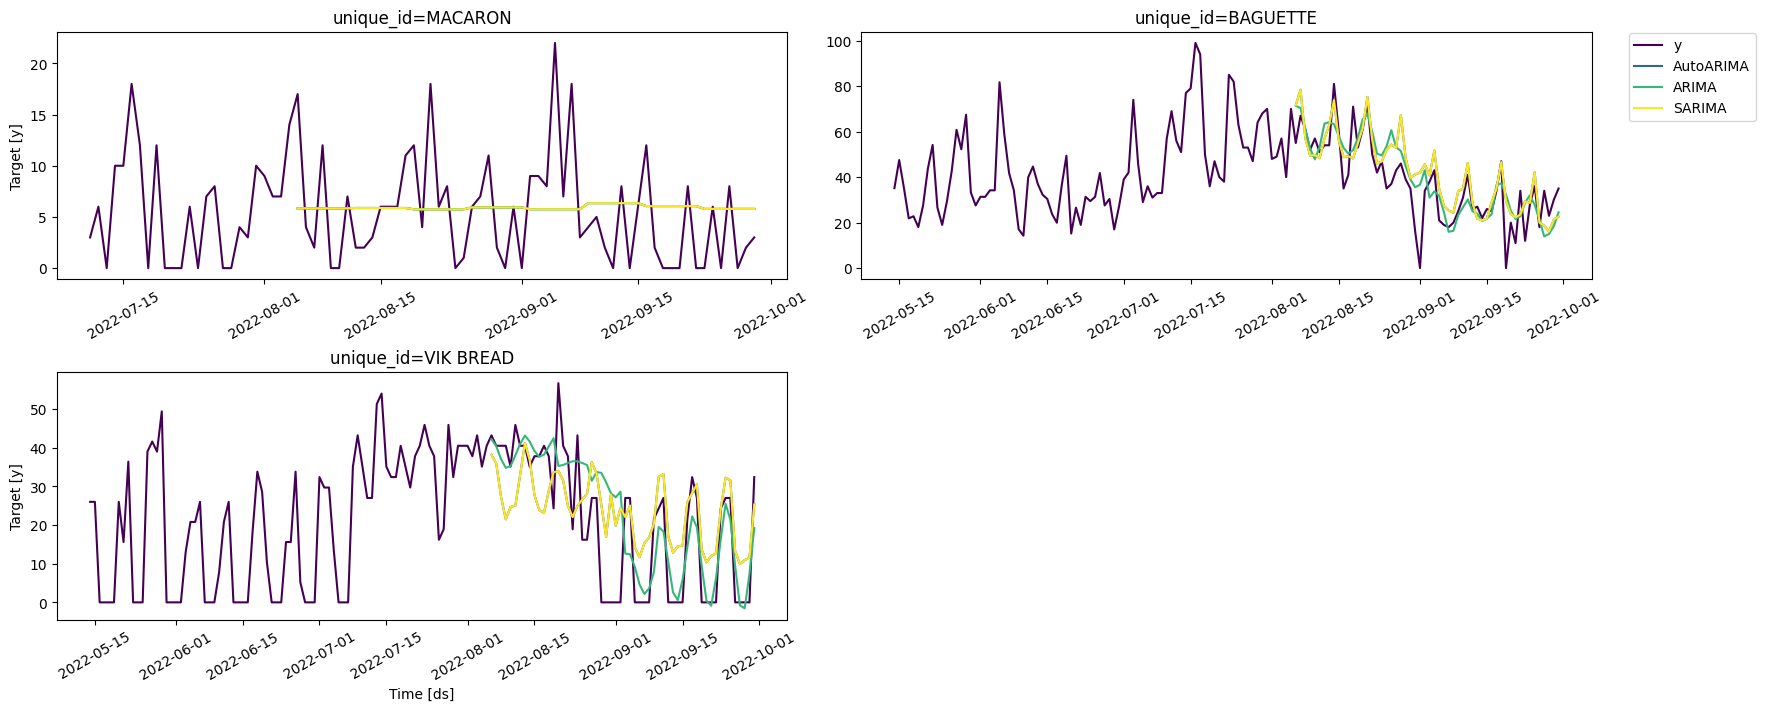

In [36]:
plot_series(
    df=df_,
    forecasts_df = cv_df.drop(["y","cutoff"],axis = 1),
    ids = ["MACARON","BAGUETTE","VIK BREAD"],
    max_insample_length= 140,
    palette = "viridis"
)

In [37]:
cv_eval = evaluate(
    cv_df.drop(["cutoff"], axis = 1),
    metrics = [mae]
)
cv_eval = cv_eval.drop(["unique_id"], axis = 1).groupby("metric").mean()
cv_eval.head()

AutoARIMA     ARIMA    SARIMA
metric                               
mae      8.032423  7.308622  8.032423

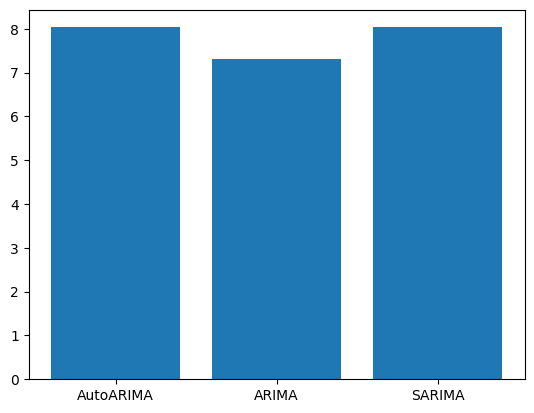

In [38]:
cv_eval.reset_index()
y = cv_eval.iloc[0]
x = cv_eval.columns
plt.bar(x,y)
plt.show()

# **Working with exogenous features**

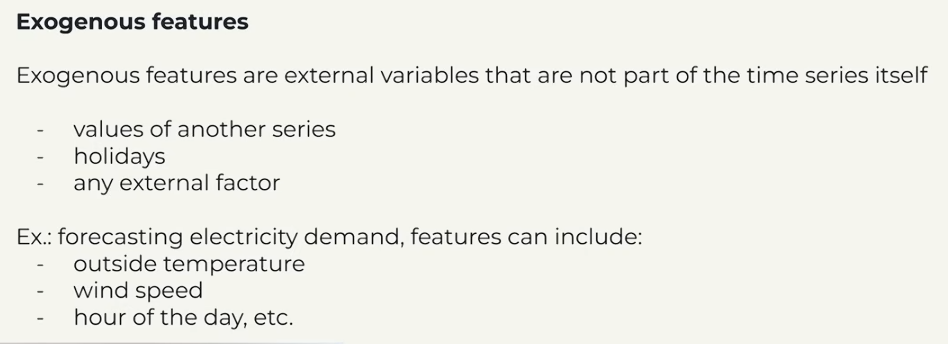

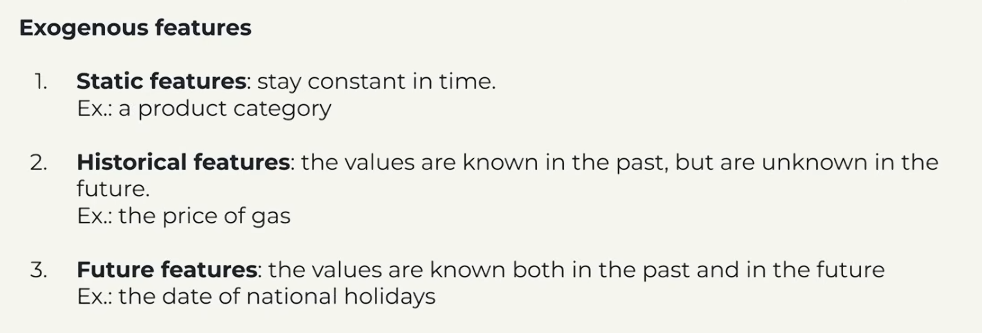

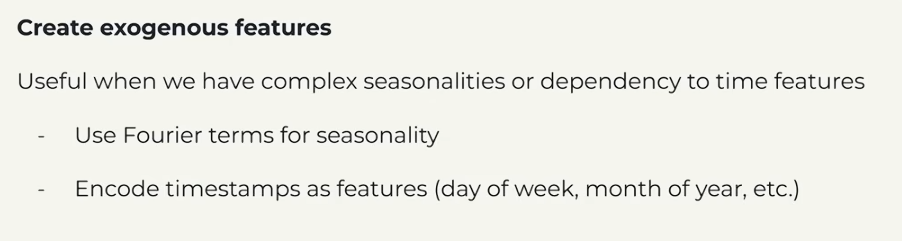

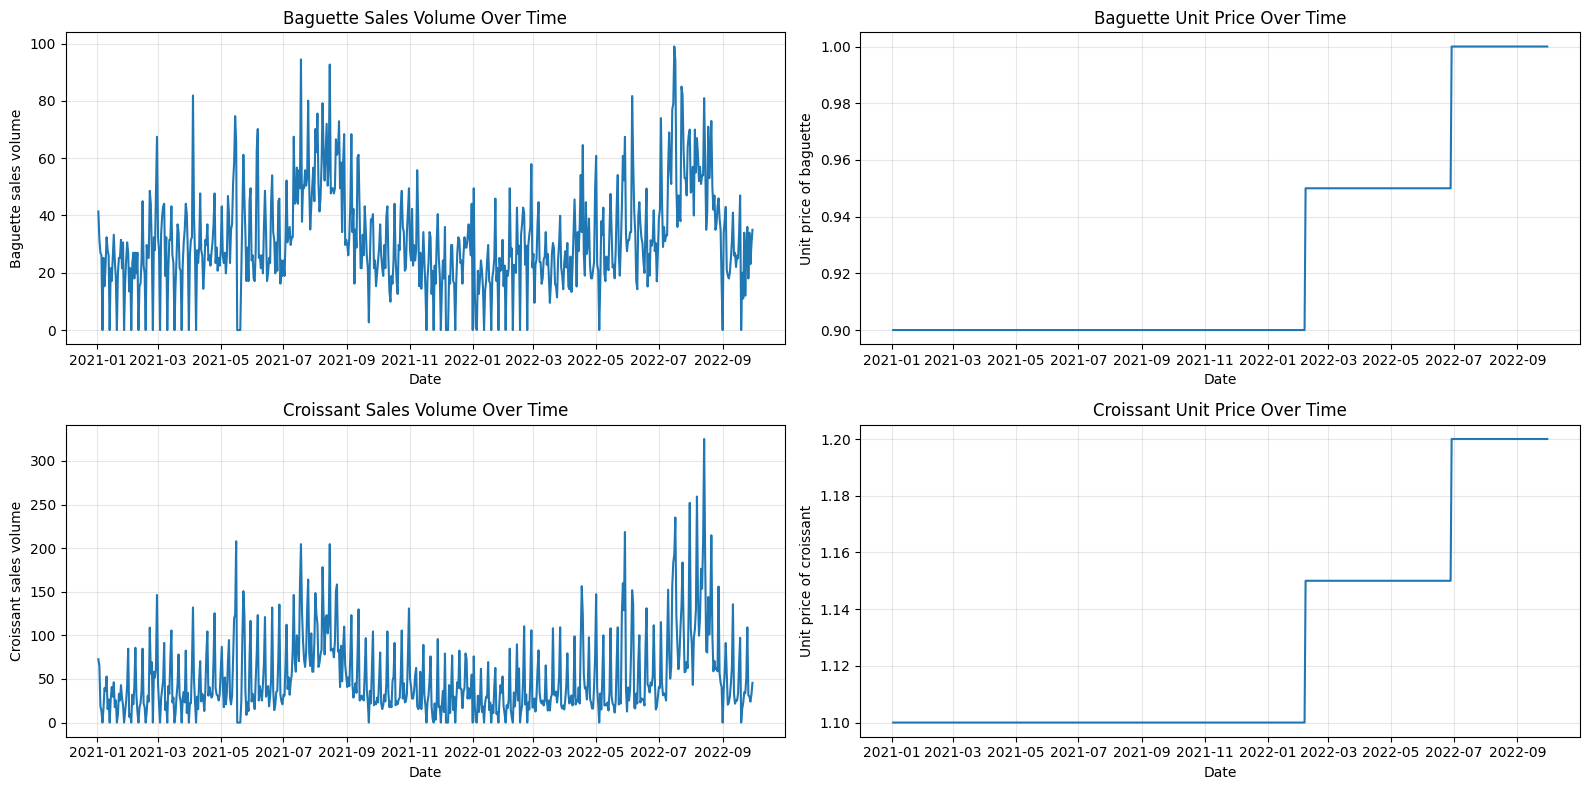

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and preprocess the data
df = pd.read_csv("/content/daily_sales_french_bakery.csv", parse_dates=["ds"])
df = df.groupby('unique_id').filter(lambda x: len(x) >= 28)
df.head()

# Filter data for specific products
baguette_plot_df = df[df["unique_id"] == "BAGUETTE"]
croissant_plot_df = df[df["unique_id"] == "CROISSANT"]

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

# Plot 1: Baguette sales volume
ax1.plot(baguette_plot_df["ds"], baguette_plot_df["y"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Baguette sales volume")
ax1.set_title("Baguette Sales Volume Over Time")
ax1.grid(True, alpha=0.3)

# Plot 2: Baguette unit price
ax2.plot(baguette_plot_df["ds"], baguette_plot_df["unit_price"])
ax2.set_xlabel("Date")
ax2.set_ylabel("Unit price of baguette")
ax2.set_title("Baguette Unit Price Over Time")
ax2.grid(True, alpha=0.3)

# Plot 3: Croissant sales volume
ax3.plot(croissant_plot_df["ds"], croissant_plot_df["y"])
ax3.set_xlabel("Date")
ax3.set_ylabel("Croissant sales volume")
ax3.set_title("Croissant Sales Volume Over Time")
ax3.grid(True, alpha=0.3)

# Plot 4: Croissant unit price (added for completeness)
ax4.plot(croissant_plot_df["ds"], croissant_plot_df["unit_price"])
ax4.set_xlabel("Date")
ax4.set_ylabel("Unit price of croissant")
ax4.set_title("Croissant Unit Price Over Time")
ax4.grid(True, alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [42]:
# Filter data for specific products
unique_ids = ["BAGUETTE", "CROISSANT"]
small_df = df[df["unique_id"].isin(unique_ids)]

# Split into train and test (last 7 days for each product as test)
test = small_df.groupby("unique_id").tail(7)
train = small_df.drop(test.index).reset_index(drop=True)


In [55]:
train.head()

unique_id         ds     y  unit_price
0  BAGUETTE 2021-01-02  41.4         0.9
1  BAGUETTE 2021-01-03  31.5         0.9
2  BAGUETTE 2021-01-04  27.0         0.9
3  BAGUETTE 2021-01-05  26.1         0.9
4  BAGUETTE 2021-01-06   0.0         0.9

In [43]:
futr_exog_df = test.drop(["y"], axis=1)
futr_exog_df.head()

unique_id         ds  unit_price
714  BAGUETTE 2022-09-24         1.0
715  BAGUETTE 2022-09-25         1.0
716  BAGUETTE 2022-09-26         1.0
717  BAGUETTE 2022-09-27         1.0
718  BAGUETTE 2022-09-28         1.0

In [46]:
models = [
    AutoARIMA(season_length=7, alias="SARIMA_exog")
]

sf = statsforecast.StatsForecast(models=models, freq="D")
sf.fit(df=train) #  train has exog feattures - prics
arima_exog_preds = sf.predict(h=7, X_df=futr_exog_df) #  predict with exog features

models = [
    AutoARIMA(season_length=7, alias="SARIMA") #  same model without exog feature
]

sf = statsforecast.StatsForecast(models=models, freq="D")
sf.fit(df=train.drop(["unit_price"], axis=1))
arima_preds = sf.predict(h=horizon) # predict without exog features

In [47]:
test_df = test.merge(arima_exog_preds, on=["unique_id", "ds"], how="left")\
              .merge(arima_preds, on=["unique_id", "ds"], how="left")
test_df

unique_id         ds      y  unit_price  SARIMA_exog      SARIMA
0    BAGUETTE 2022-09-24   28.0         1.0    28.898898   28.657114
1    BAGUETTE 2022-09-25   36.0         1.0    42.513264   42.182373
2    BAGUETTE 2022-09-26   18.0         1.0    20.423976   20.013652
3    BAGUETTE 2022-09-27   34.0         1.0    19.066264   18.646490
4    BAGUETTE 2022-09-28   23.0         1.0    16.468885   16.114925
5    BAGUETTE 2022-09-29   30.0         1.0    21.656726   21.288019
6    BAGUETTE 2022-09-30   35.0         1.0    23.101235   22.660124
7   CROISSANT 2022-09-24   51.6         1.2    64.424926   64.011002
8   CROISSANT 2022-09-25  109.2         1.2   135.124207  134.488202
9   CROISSANT 2022-09-26   31.2         1.2    43.526109   42.735407
10  CROISSANT 2022-09-27   30.0         1.2    19.290040   18.400717
11  CROISSANT 2022-09-28   24.0         1.2    21.044583   20.222397
12  CROISSANT 2022-09-29   32.4         1.2    36.120334   35.192344
13  CROISSANT 2022-09-30   45.6         1.2    41.486481   40.489842

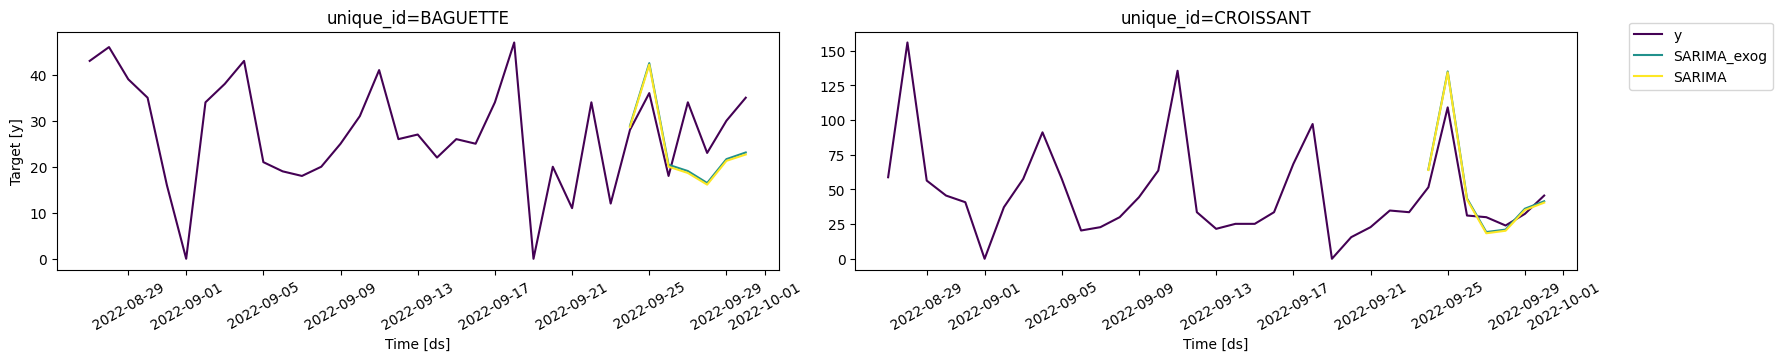

In [48]:
plot_series(
    df=train,
    forecasts_df=test_df,
    ids=["BAGUETTE", "CROISSANT"],
    max_insample_length=28,
    models=["SARIMA_exog", "SARIMA"],
    palette="viridis"
)

# **cross-validation with exogenous features**

In [49]:
models = [
    AutoARIMA(season_length=7, alias="SARIMA_exog")
]

sf = statsforecast.StatsForecast(models=models, freq="D")
cv_exog_df = sf.cross_validation(
    h=horizon, # 7 days
    df=small_df,
    n_windows=8,
    step_size=7,
    refit=True
)

cv_exog_df.head()

unique_id         ds     cutoff     y  SARIMA_exog
0  BAGUETTE 2022-08-06 2022-08-05  55.0    71.511528
1  BAGUETTE 2022-08-07 2022-08-05  67.0    78.458054
2  BAGUETTE 2022-08-08 2022-08-05  61.0    57.062745
3  BAGUETTE 2022-08-09 2022-08-05  52.0    49.525901
4  BAGUETTE 2022-08-10 2022-08-05  57.0    49.485683

In [50]:
cv_exog_eval = evaluate(
    cv_exog_df.drop(["cutoff"], axis=1),
    metrics=[mae],
)
cv_exog_eval = cv_exog_eval.drop(['unique_id'], axis=1).groupby('metric').mean().reset_index()
cv_exog_eval

metric  SARIMA_exog
0    mae    19.211687

# **creating features from time_stamp**

In [51]:
from functools import partial
from utilsforecast.feature_engineering import fourier, time_features, pipeline
# fourier to encode the seasonality information
# time features to get information form the time_Stamp to know the ay of week month , etc
# pipeline to create many feature in one go
features = [
    partial(fourier, season_length=7, k=2), #  function deficnition
    partial(time_features, features=["day", "week", "month"])
]

small_exog_df, futr_exog_df = pipeline(
    df=small_df,
    features=features,
    freq="D",
    h=horizon
)

In [52]:
small_exog_df.head()

unique_id         ds     y  unit_price    sin1_7    sin2_7    cos1_7  \
84  BAGUETTE 2021-01-02  41.4         0.9  0.781832  0.974928  0.623490   
85  BAGUETTE 2021-01-03  31.5         0.9  0.974928 -0.433884 -0.222521   
86  BAGUETTE 2021-01-04  27.0         0.9  0.433884 -0.781831 -0.900969   
87  BAGUETTE 2021-01-05  26.1         0.9 -0.433884  0.781832 -0.900969   
88  BAGUETTE 2021-01-06   0.0         0.9 -0.974928  0.433884 -0.222521   

      cos2_7  day  week  month  
84 -0.222521    2    53      1  
85 -0.900969    3    53      1  
86  0.623490    4     1      1  
87  0.623490    5     1      1  
88 -0.900969    6     1      1

In [53]:
futr_exog_df

unique_id         ds    sin1_7    sin2_7    cos1_7    cos2_7  day  week  \
0    BAGUETTE 2022-10-01  0.781844  0.974919  0.623474 -0.222559    1    39   
1    BAGUETTE 2022-10-02  0.974927 -0.433892 -0.222526 -0.900965    2    39   
2    BAGUETTE 2022-10-03  0.433893 -0.781844 -0.900964  0.623474    3    40   
3    BAGUETTE 2022-10-04 -0.433861  0.781800 -0.900980  0.623529    4    40   
4    BAGUETTE 2022-10-05 -0.974933  0.433846 -0.222500 -0.900987    5    40   
5    BAGUETTE 2022-10-06 -0.781828 -0.974931  0.623495 -0.222509    6    40   
6    BAGUETTE 2022-10-07 -0.000009 -0.000017  1.000000  1.000000    7    40   
7   CROISSANT 2022-10-01  0.781844  0.974919  0.623474 -0.222559    1    39   
8   CROISSANT 2022-10-02  0.974927 -0.433892 -0.222526 -0.900965    2    39   
9   CROISSANT 2022-10-03  0.433893 -0.781844 -0.900964  0.623474    3    40   
10  CROISSANT 2022-10-04 -0.433861  0.781800 -0.900980  0.623529    4    40   
11  CROISSANT 2022-10-05 -0.974933  0.433846 -0.222500 -0.900987    5    40   
12  CROISSANT 2022-10-06 -0.781828 -0.974931  0.623495 -0.222509    6    40   
13  CROISSANT 2022-10-07 -0.000009 -0.000017  1.000000  1.000000    7    40   

    month  
0      10  
1      10  
2      10  
3      10  
4      10  
5      10  
6      10  
7      10  
8      10  
9      10  
10     10  
11     10  
12     10  
13     10

In [56]:
models = [
    AutoARIMA(season_length=7, alias="SARIMA_time_exog")
]

sf = statsforecast.StatsForecast(models=models, freq="D")
cv_time_exog_df = sf.cross_validation(
    h=horizon, # 7 days
    df=small_exog_df,
    n_windows=8,
    step_size=horizon,
    refit=True
)

cv_time_exog_eval = evaluate(
    cv_time_exog_df.drop(["cutoff"], axis=1),
    metrics=[mae],
)
cv_time_exog_eval = cv_time_exog_eval.drop(['unique_id'], axis=1).groupby('metric').mean().reset_index()
cv_time_exog_eval

metric  SARIMA_time_exog
0    mae         19.721581

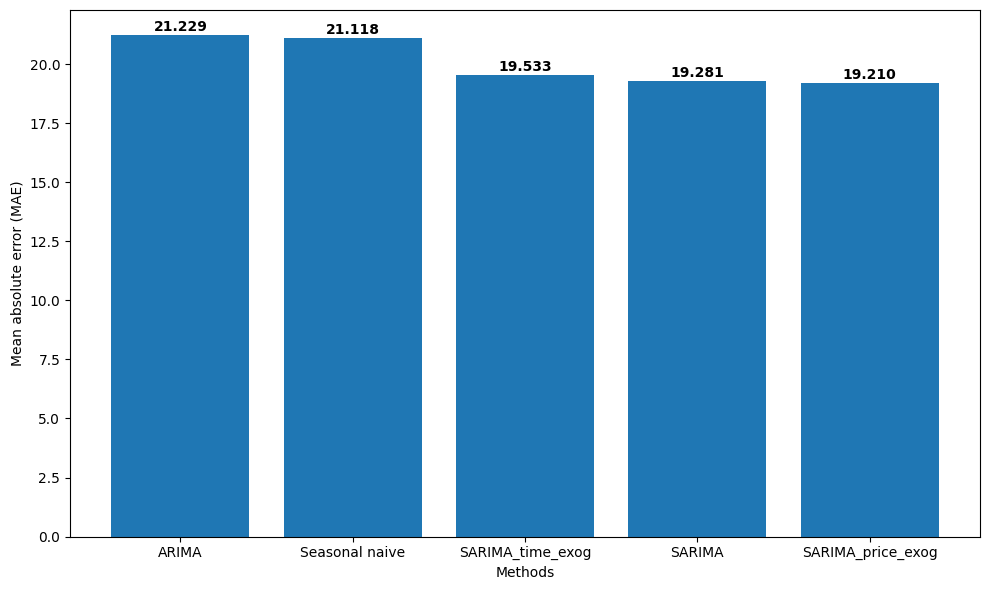

In [57]:
methods = ["ARIMA", "Seasonal naive", "SARIMA", "SARIMA_price_exog", "SARIMA_time_exog"]
values = [21.229, 21.118, 19.281, 19.210, 19.533]

sorted_data = sorted(zip(methods, values), key=lambda x: x[1], reverse=True)
methods_sorted, values_sorted = zip(*sorted_data)

plt.figure(figsize=(10, 6))
bars = plt.bar(methods_sorted, values_sorted)

for bar, value in zip(bars, values_sorted):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Methods')
plt.ylabel('Mean absolute error (MAE)')
plt.tight_layout()

plt.show()

# **prediction intervals**

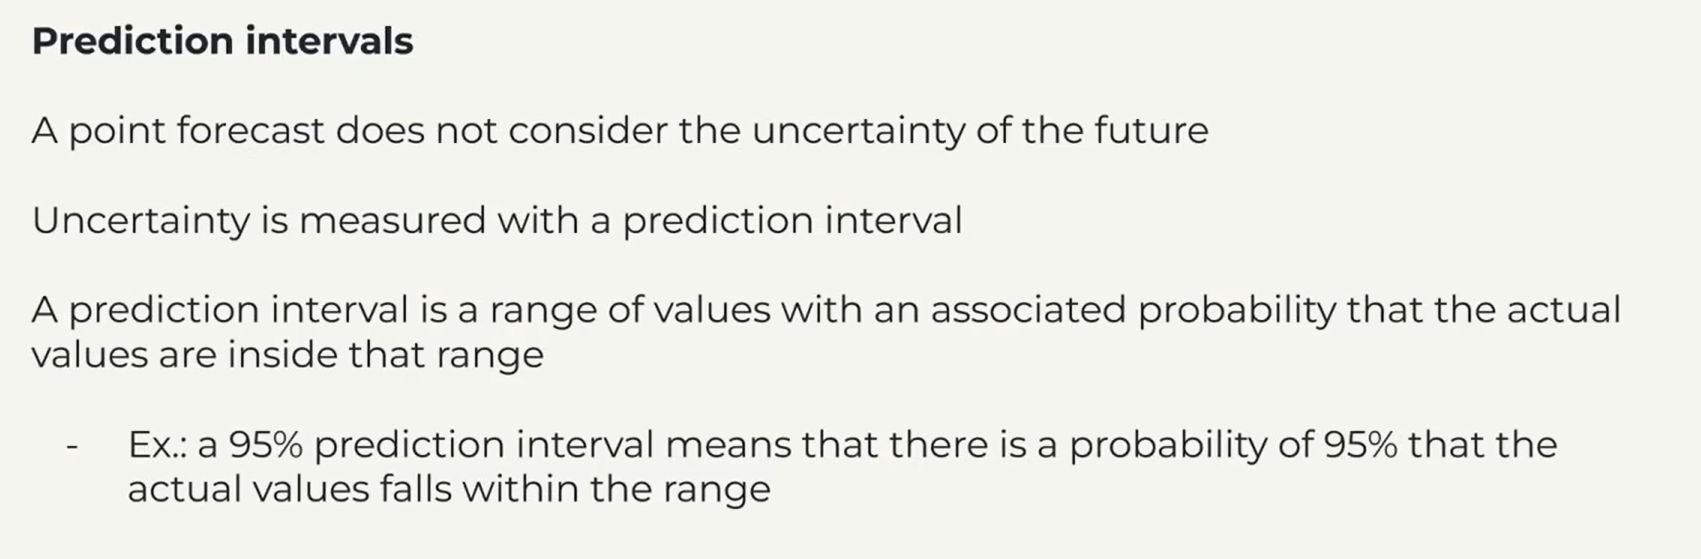

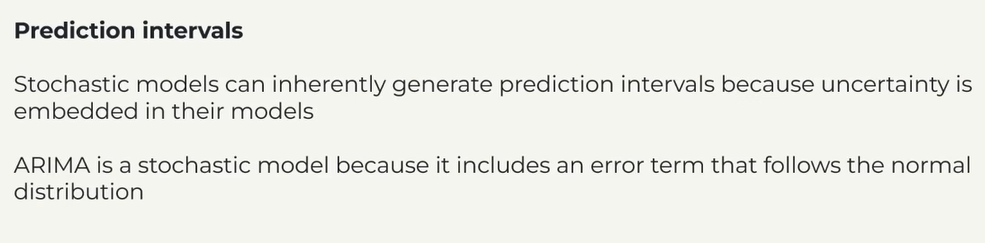

```
A 95% prediction level means we're 95% confident that the true future value will fall within the predicted interval

It gives you a range (lower bound to upper bound) rather than just a single point forecast

Commonly used levels: 80%, 90%, 95%, 99%
```

In [58]:
unique_ids = ["BAGUETTE", "CROISSANT"]
small_df = df[df["unique_id"].isin(unique_ids)]
test = small_df.groupby("unique_id").tail(7)
train = small_df.drop(test.index).reset_index(drop=True)
train.head()

unique_id         ds     y  unit_price
0  BAGUETTE 2021-01-02  41.4         0.9
1  BAGUETTE 2021-01-03  31.5         0.9
2  BAGUETTE 2021-01-04  27.0         0.9
3  BAGUETTE 2021-01-05  26.1         0.9
4  BAGUETTE 2021-01-06   0.0         0.9

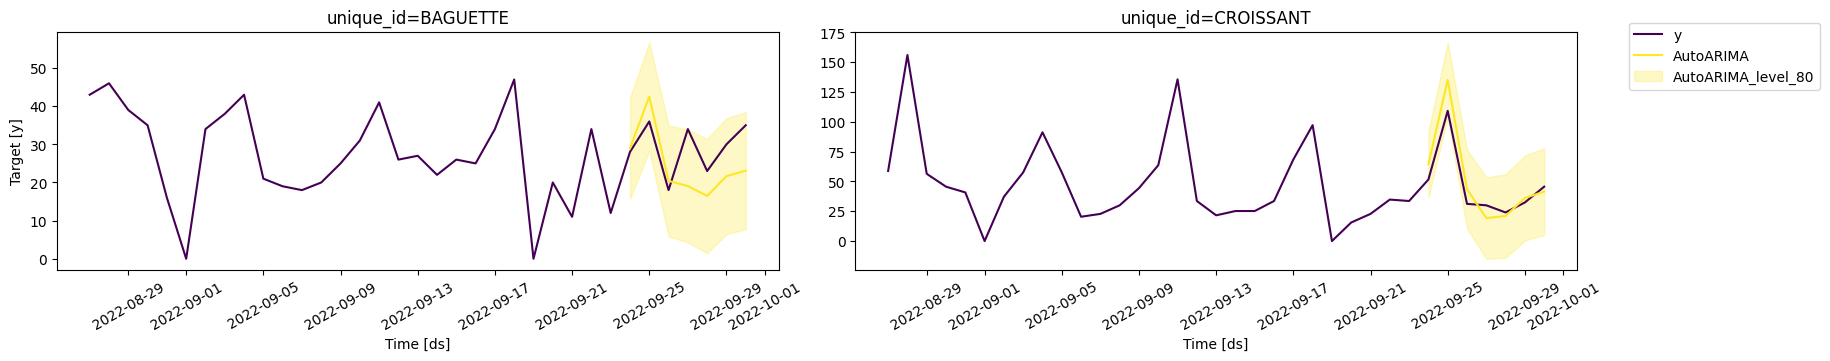

In [66]:
models = [
    AutoARIMA(season_length=7)
]

sf = statsforecast.StatsForecast(models=models, freq="D")
sf.fit(df=train)
prob_preds = sf.predict(h=horizon, X_df=test.drop(["y"], axis=1),
                        level=[80] # level = 80 means prediction interval 80% [95,100]
                        )
test_df = test.merge(prob_preds, on=["unique_id", "ds"], how="left")
plot_series(
    df=train,
    forecasts_df=test_df,
    ids=["BAGUETTE", "CROISSANT"],
    max_insample_length=28,
    models=["AutoARIMA"],
    level=[80],
    palette="viridis"
)

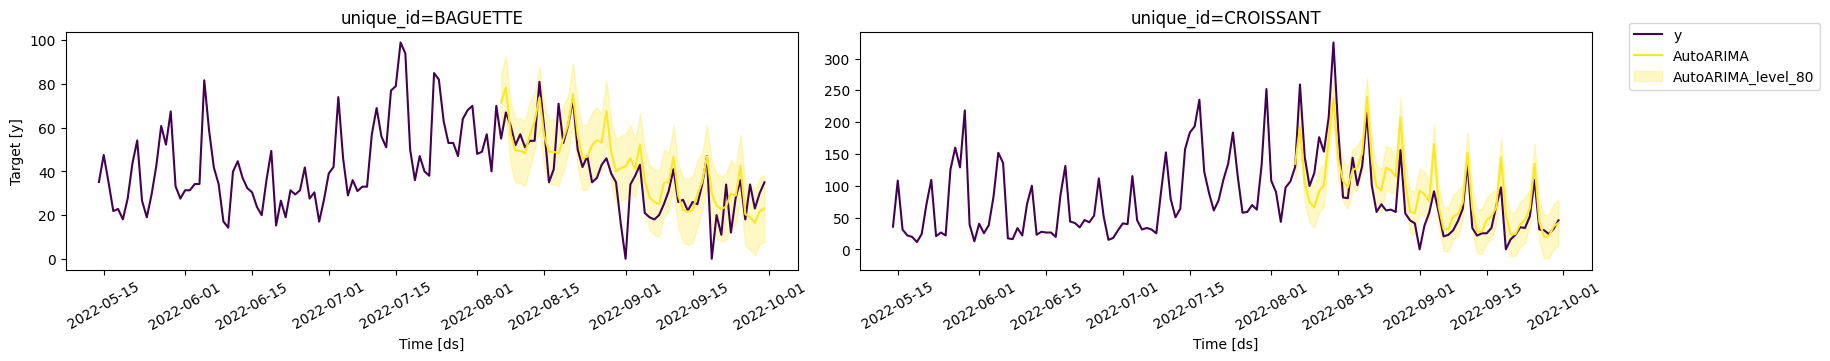

In [60]:
models = [
    AutoARIMA(season_length=7)
]

sf = statsforecast.StatsForecast(models=models, freq="D")
cv_prob_df = sf.cross_validation(
    h=horizon,
    df=small_df,
    n_windows=8,
    step_size=7,
    refit=True,
    level=[80], # here prediction level
)
plot_series(
    df=small_df,
    forecasts_df=cv_prob_df.drop(["y", "cutoff"], axis=1),
    ids=["BAGUETTE", "CROISSANT"],
    models=["AutoARIMA"],
    max_insample_length=140,
    level=[80],
    palette="viridis"
)

# **Evaluation metrics**

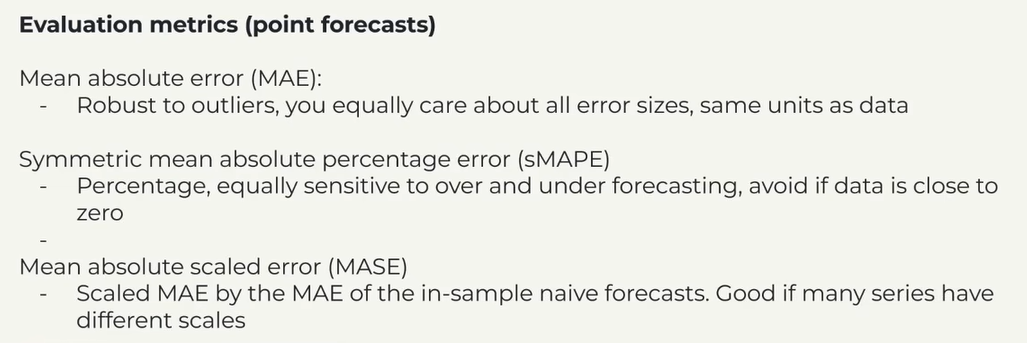

In [61]:
models = [
    AutoARIMA(season_length=7, alias="SARIMA_exog"),
    SeasonalNaive(season_length=7)
]

sf = statsforecast.StatsForecast(models=models, freq="D")
final_cv_df = sf.cross_validation(
    h=horizon,
    df=small_df,
    n_windows=8,
    step_size=7,
    refit=True,
    level=[80],
)
final_cv_df.head()

unique_id         ds     cutoff     y  SARIMA_exog  SARIMA_exog-lo-80  \
0  BAGUETTE 2022-08-06 2022-08-05  55.0    71.511528          58.279213   
1  BAGUETTE 2022-08-07 2022-08-05  67.0    78.458054          64.354114   
2  BAGUETTE 2022-08-08 2022-08-05  61.0    57.062745          42.622201   
3  BAGUETTE 2022-08-09 2022-08-05  52.0    49.525901          34.847356   
4  BAGUETTE 2022-08-10 2022-08-05  57.0    49.485683          34.606853   

   SARIMA_exog-hi-80  SeasonalNaive  SeasonalNaive-lo-80  SeasonalNaive-hi-80  
0          84.743843           68.0            50.158042            85.841958  
1          92.561995           70.0            52.158042            87.841958  
2          71.503290           48.0            30.158042            65.841958  
3          64.204446           49.0            31.158042            66.841958  
4          64.364512           57.0            39.158042            74.841958

In [69]:
temp_test = small_df.groupby("unique_id").tail(7*8) # for mase
temp_train = small_df.drop(temp_test.index).reset_index(drop=True) # mase
models = ["SARIMA_exog", "SeasonalNaive"]
metrics = [
    mae, #  this one preferred
    mse,
    rmse,
    mape,
    smape, #  this one prefereed
    partial(mase, seasonality=7),  #  this one prefereed
    scaled_crps
]

final_eval = evaluate(
    final_cv_df.drop(["ds", "cutoff"], axis=1),
    metrics=metrics,
    models=models,
    train_df=temp_train,
    level=[80]
)
final_eval = final_eval.drop(['unique_id'], axis=1).groupby('metric').mean().reset_index()
final_eval

metric  SARIMA_exog  SeasonalNaive
0          mae    19.211687      21.117857
1         mape     0.328615       0.376819
2         mase     1.181499       1.328592
3          mse   792.788111     970.417143
4         rmse    24.979598      27.875413
5  scaled_crps     0.153636       0.166451
6        smape     0.168241       0.211317

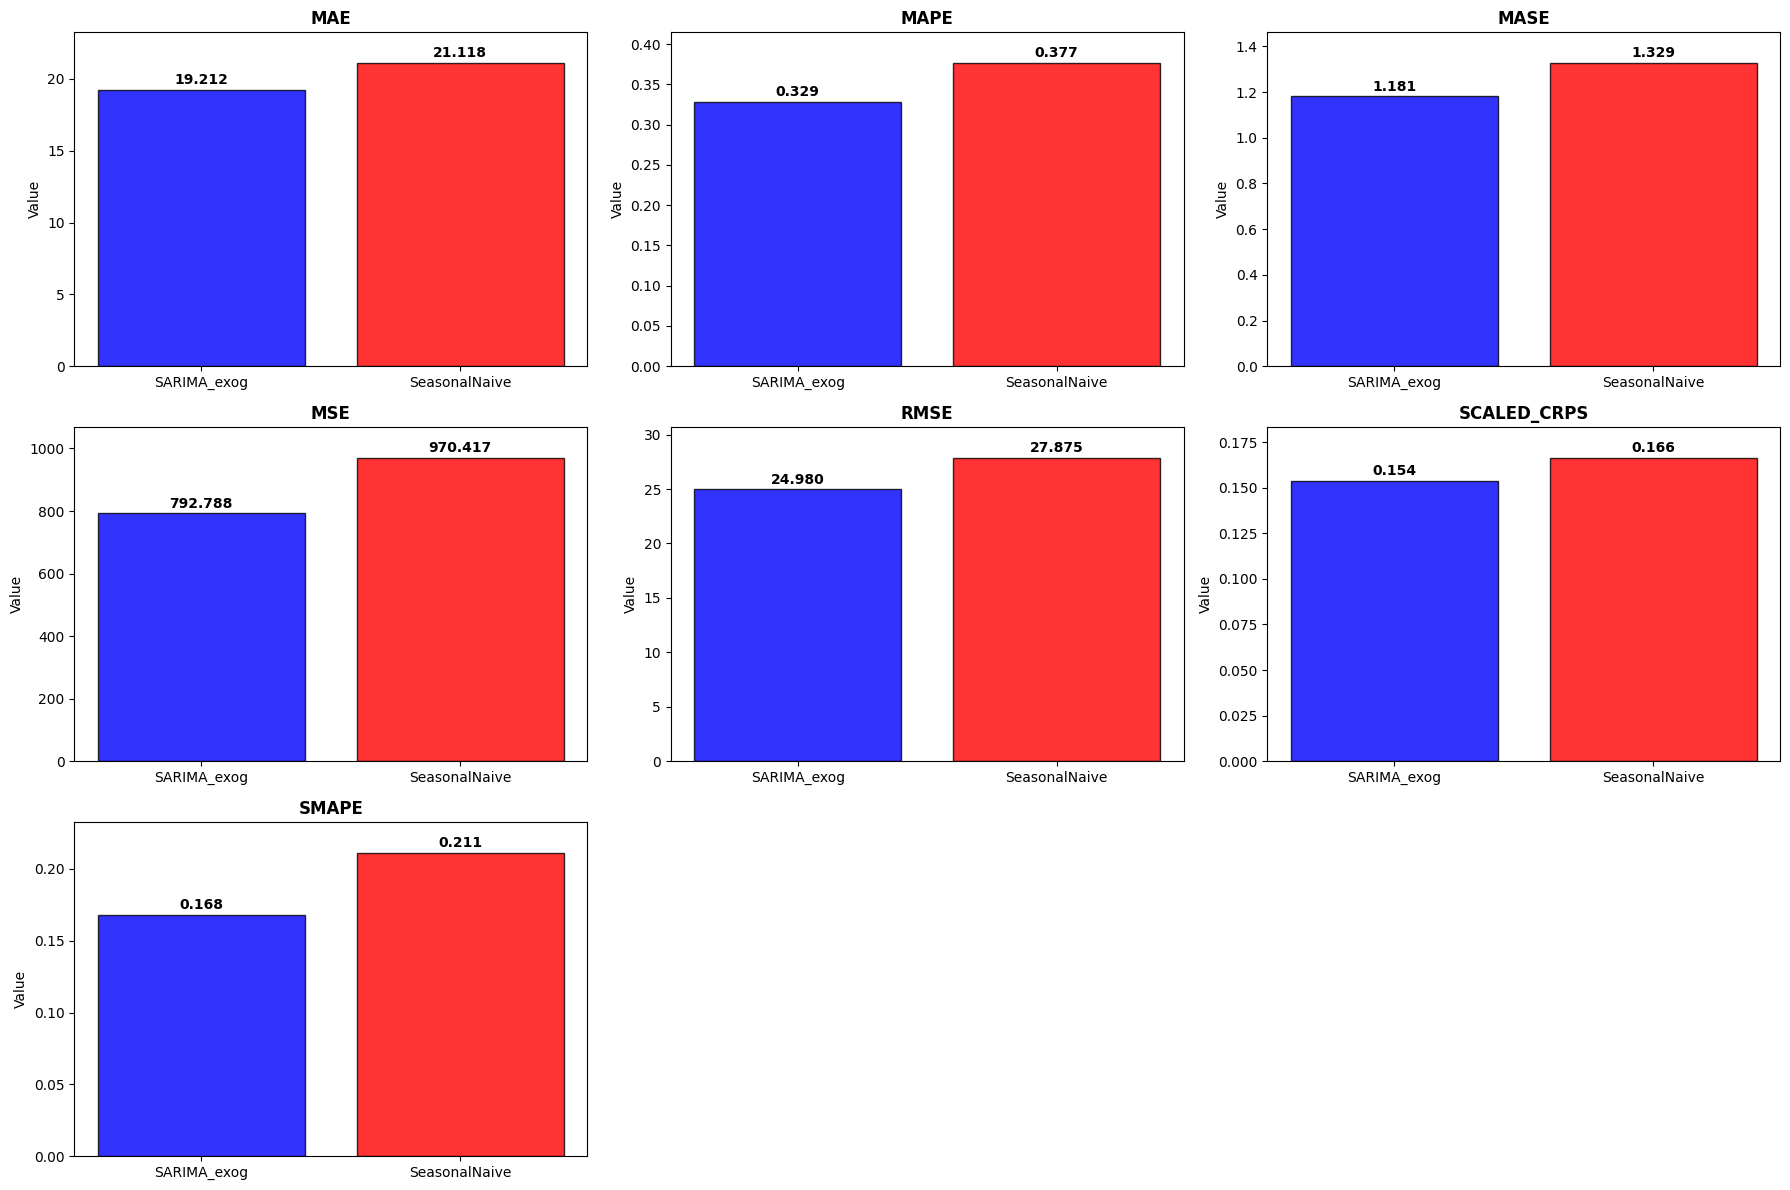

In [63]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

axes_flat = axes.flatten()

models = ['SARIMA_exog', 'SeasonalNaive']
x_pos = [0, 1]
colors = ['blue', 'red']

for i, row in final_eval.iterrows():
    ax = axes_flat[i]

    model_values = [row['SARIMA_exog'], row['SeasonalNaive']]

    bars = ax.bar(x_pos, model_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

    for j, (bar, value) in enumerate(zip(bars, model_values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

    ax.set_title(row['metric'].upper(), fontweight='bold', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models, ha='center')
    ax.set_ylabel('Value')
    max_value = max(model_values)
    ax.set_ylim(0, max_value * 1.1)

fig.delaxes(axes_flat[7])

axes_flat[8].set_visible(False)

plt.tight_layout()
plt.show()